# Linear Regression From Scratch

### Import library and setup dependency

#### Universal library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3 decimal places, no scientific notation
np.set_printoptions(precision=3, suppress=True)

#### Customize library

In [2]:
import os
import sys

# Set project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

print(f"current: {os.getcwd()}")
print(f"root   : {project_root}")

current: c:\Users\BTCOM\Desktop\DeepLearning\ML01-linear-regression-from-scratch
root   : c:\Users\BTCOM\Desktop\DeepLearning


In [3]:
import custom_library.utils as ut
import custom_library.models as my_models

# Set autoreload for external modules change
%load_ext autoreload 
%autoreload 2

### ML: No Hidden layer, 1 overall neural


#### Load dataset and Set up models

In [4]:
# Overview (Machine Learning from Scratch):
# Input layer: 500 sample_dims with 2 features input each 
# First Hidden Layer: -
# Penultimate Layer: -
# Output Layer: 1 nerual network, no activate funciton
sample_dim = 500
split_ration = 0.8
input_dim = 2
output_dim = 1

# Generate some linear sample_dim data
linear = np.linspace(0.0, 1, 500).reshape(-1, 1)

# y_pred = X * w + b
# y_pred [sameple, t_dim] = X [sample_dim, input_dim] * w [input_dim, output_dim] + b [1, output_dim]
# y_pred [500,] = X [500,2] * w [2,] + b [1,]
y_true =  pow(linear,3) + np.random.rand(500,1)*0.02
y_pred = np.random.rand(sample_dim,output_dim)  
X = np.column_stack((linear, pow(linear, 2))) + np.random.rand(500,1)*0.1
W1 = np.random.rand(input_dim,output_dim)  # one weight per feature
b1 = np.random.rand(1,output_dim)  # single bias term

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])

# Hyperparameters
epochs = 1000
batch_size = 32
learning_rate = 0.001

#### Visualize Dataset

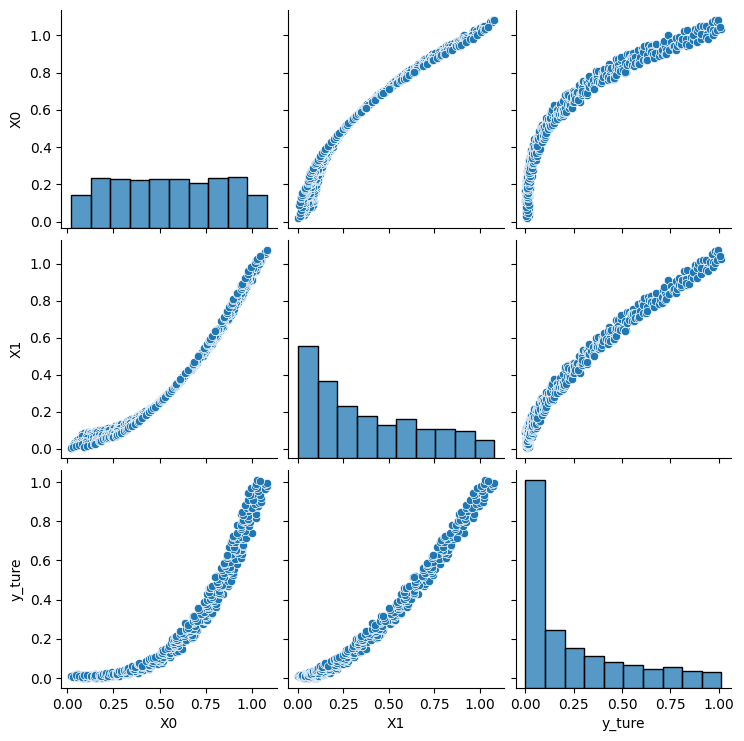

In [5]:
# put your inputs and outputs together in one DataFrame
df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]

# make the pairplot
sns.pairplot(df)

#### Train Models

In [6]:
def fit_linear_regression_no_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, epochs=10, batch_size=32, learning_rate=0.001):
    train_accs = []
    val_accs = []

    for j in range(epochs):
        for i in range(0, len(X_train), batch_size):
            # Fetch the batch
            X_train_batch = X_train[i:i+batch_size]
            y_train_batch = y_train[i:i+batch_size]

            # Forward pass
            y_pred_batch = np.dot(X_train_batch, W1) + b1

            # Compute gradients
            # Mean Squared Error Loss: L = (1/N) * Σ(y_true - y_pred)^2
            # Gradient of L w.r.t. y_pred: dL/da = (2/N) * (y_pred - y_true)
            dL_dz = (2/batch_size) * (y_pred_batch - y_train_batch) 

            # Gradient of L w.r.t. W1: dL/dW1 = X^T * dL/da
            # Summation of Xi * Li, (1,500) * (500,1) = (1,1)
            dw = np.dot(X_train_batch.T, dL_dz)

            # Gradient of L w.r.t. b1: dL/db1 = Σ(dL/da)
            db = np.sum(dL_dz, axis=0, keepdims=True)

            # Update weights and bias
            # Gradient Descent update rule
            # W = W - learning_rate * dL/dW
            W1 -= learning_rate * dw

            # b = b - learning_rate * dL/db
            b1 -= learning_rate * db

        # Evaluate accuracy on the entire dataset after each epoch
        y_train_pred = np.dot(X_train, W1) + b1
        y_eval_pred = np.dot(X_eval, W1) + b1
        print(f"Epoch {j+1}/{epochs} accuracy: {ut.accuracy(y_eval, y_eval_pred):.3f}")

        # Score History
        train_acc = ut.accuracy(y_train, y_train_pred)
        val_acc = ut.accuracy(y_eval, y_eval_pred)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    y_pred = np.dot(X_eval, W1) + b1
    return W1, b1, y_pred, train_accs, val_accs

In [7]:
"Before training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'Before training, accuracy: 0.330'

In [8]:
W1, b1, y_pred, train_accs, val_accs = fit_linear_regression_no_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

Epoch 1/1000 accuracy: 1.004
Epoch 2/1000 accuracy: 0.968
Epoch 3/1000 accuracy: 0.933
Epoch 4/1000 accuracy: 0.900
Epoch 5/1000 accuracy: 0.867
Epoch 6/1000 accuracy: 0.836
Epoch 7/1000 accuracy: 0.806
Epoch 8/1000 accuracy: 0.777
Epoch 9/1000 accuracy: 0.749
Epoch 10/1000 accuracy: 0.723
Epoch 11/1000 accuracy: 0.697
Epoch 12/1000 accuracy: 0.672
Epoch 13/1000 accuracy: 0.648
Epoch 14/1000 accuracy: 0.625
Epoch 15/1000 accuracy: 0.602
Epoch 16/1000 accuracy: 0.581
Epoch 17/1000 accuracy: 0.560
Epoch 18/1000 accuracy: 0.540
Epoch 19/1000 accuracy: 0.521
Epoch 20/1000 accuracy: 0.503
Epoch 21/1000 accuracy: 0.485
Epoch 22/1000 accuracy: 0.468
Epoch 23/1000 accuracy: 0.451
Epoch 24/1000 accuracy: 0.435
Epoch 25/1000 accuracy: 0.420
Epoch 26/1000 accuracy: 0.405
Epoch 27/1000 accuracy: 0.391
Epoch 28/1000 accuracy: 0.377
Epoch 29/1000 accuracy: 0.364
Epoch 30/1000 accuracy: 0.351
Epoch 31/1000 accuracy: 0.339
Epoch 32/1000 accuracy: 0.327
Epoch 33/1000 accuracy: 0.315
Epoch 34/1000 accur

In [9]:
"After training, accuracy: {:}".format(ut.accuracy(y_eval, y_pred))

'After training, accuracy: 0.0750096572349234'

#### Evaluate Models

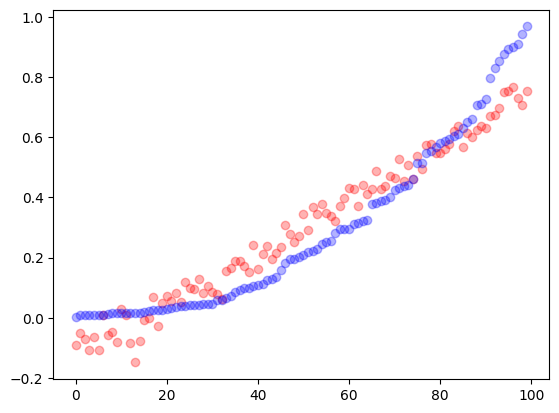

In [10]:
y_pred_sort, y_eval_sort = ut.sort_data(y_pred, y_eval)

i = range(len(y_pred_sort))
plt.scatter(i, y_pred_sort, alpha=0.3, color='red', label='Predictions')
plt.scatter(i, y_eval_sort, alpha=0.3, color='blue', label='True Values')

plt.show()

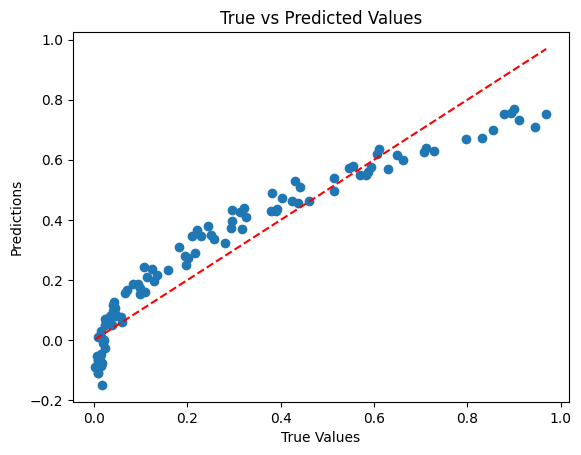

In [11]:
# 1. y_true vs y_pred
plt.scatter(y_eval, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_eval.min(), y_eval.max()], [y_eval.min(), y_eval.max()], 'r--')
plt.title('True vs Predicted Values')
plt.show()


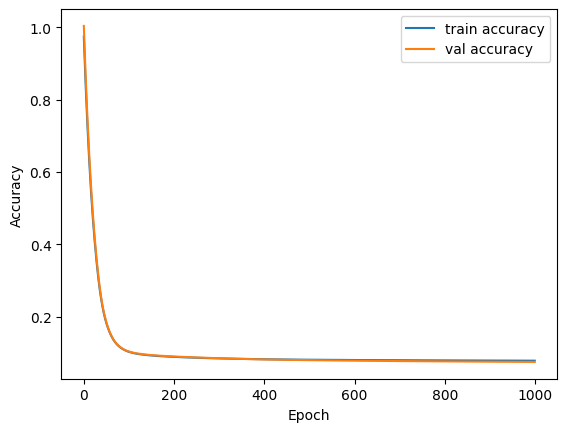

In [12]:
plt.plot(train_accs, label='train accuracy')
plt.plot(val_accs, label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### DL: 1 hidden layer, 3 overall neurals

#### Load dataset and Set up models

In [13]:
# Overview (Deep Learning from Scratch):
# Input layer: 500 sample_dims with 2 features input each 
# First Hidden Layer: 2 input dim, 2 output dim, ReLU activate funciton
# Output Layer: 2 input dim, 1 output dim, no activate funciton
# Input (500,2) -> Hidden Layer 2 neurals (2,2) -> Output 1 neural (2,1)

sample_dim = 5000
split_ration = 0.8
input_dim = 2
h_dim = 300
output_dim = 1

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z1 = X * W1 + b1
# z1 [sample_dim, h_dim] = X [sample_dim, input_dim] * W1 [input_dim, h_dim] + b1 [1, h_dim]

# a1 = relu(z1)
# a1 [sample_dim, h_dim] = relu(z1) [sample_dim, h_dim]

# z2 = a1 * W2 + b2
# z2 [sample_dim, output_dim] = a1 [sample_dim, h_dim] * W2 [h_dim, output_dim] + b2 [1, output_dim]
# y_pred = z2

# z [sample_dim, output_dim]
y_true = np.pow(linear,3) - np.pow(linear+0.2,2)*0.5 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 2))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])

# W1 [input_dim, h_dim]
# b1 [1, h_dim]

W1 = np.random.rand(input_dim,h_dim)*0.7+0.3
b1 = np.random.rand(1,h_dim)*0.7+0.3

# W2 [h_dim, output_dim]
# b2 [1, output_dim]
W2 = np.random.rand(h_dim,output_dim)*0.7+0.3
b2 = np.random.rand(1,output_dim)*0.7+0.3

# Hyperparameters
epochs = 100
batch_size = 16
learning_rate = 0.001

In [14]:
np.random.randint(30, 100, (10, 1))/100

array([[0.46],
       [0.45],
       [0.8 ],
       [0.49],
       [0.55],
       [0.83],
       [0.51],
       [0.94],
       [0.77],
       [0.84]])

#### Visualize Dataset

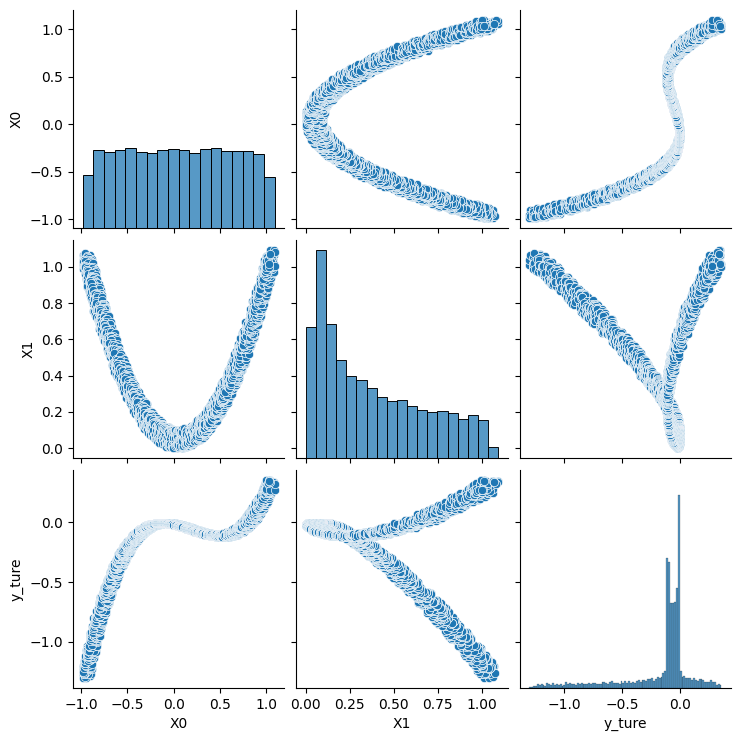

In [15]:
# put your inputs and outputs together in one DataFrame
df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]

# make the pairplot
sns.pairplot(df)

#### Train Models

In [16]:
def fit_linear_regression_one_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, epochs=10, batch_size=32, learning_rate=0.001):
    train_accs = []
    val_accs = []

    for j in range(epochs):
        for i in range(0, len(X_train), batch_size):
            # Fetch the batch
            X_train_batch = X_train[i:i+batch_size]
            y_train_batch = y_train[i:i+batch_size]

            # Forward pass
            z1 = np.dot(X_train_batch, W1) + b1
            a1 = ut.relu(z1)
            z2 = np.dot(a1, W2) + b2
            y_pred_batch = z2

            # Compute gradients
            # Mean Squared Error Loss: L = (1/N) * Σ(y_true - y_pred)^2
            # Gradient of L w.r.t. y_pred: dL/dz2 = (2/N) * (y_pred - y_true)
            dL_dz2 = (2/batch_size) * (y_pred_batch - y_train_batch) 

            # Gradient of L w.r.t. dL/dz1 = dL/dz2 * W2^T
            dL_dz1 = np.dot(dL_dz2, W2.T) * ut.relu_derivative(z1)

            # Gradient of L w.r.t. W1: dL/dW1 = X^T * dL/da
            # Summation of Xi * Li, (1,500) * (500,1) = (1,1)
            dw2 = np.dot(a1.T, dL_dz2)
            dw1 = np.dot(X_train_batch.T, dL_dz1)  

            # Gradient of L w.r.t. b1: dL/db1 = Σ(dL/da)
            db2 = np.sum(dL_dz2, axis=0, keepdims=True)
            db1 = np.sum(dL_dz1, axis=0, keepdims=True)

            # Update weights and bias
            # Gradient Descent update rule
            # W = W - learning_rate * dL/dW
            W1 -= learning_rate * dw1
            W2 -= learning_rate * dw2

            # b = b - learning_rate * dL/db
            b1 -= learning_rate * db1
            b2 -= learning_rate * db2

        # Evaluate accuracy on the entire dataset after each epoch
        z1 = np.dot(X_eval, W1) + b1
        a1 = ut.relu(z1)
        z2 = np.dot(a1, W2) + b2
        y_eval_pred= z2
        print(f"Epoch {j+1}/{epochs} accuracy: {ut.accuracy(y_eval, y_eval_pred):.3f}")

        z1 = np.dot(X_train, W1) + b1
        a1 = ut.relu(z1)
        z2 = np.dot(a1, W2) + b2
        y_train_pred= z2

        # Score History
        train_acc = ut.accuracy(y_train, y_train_pred)
        val_acc = ut.accuracy(y_eval, y_eval_pred)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    # Finised y_pred
    z1 = np.dot(X_eval, W1) + b1
    a1 = ut.relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = z2

    return W1, b1, W2, b2, y_pred, train_accs, val_accs

In [17]:
"Before training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'Before training, accuracy: 0.668'

In [18]:
W1, b1, W2, b2, y_pred, train_accs, val_accs = fit_linear_regression_one_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

Epoch 1/100 accuracy: 0.417
Epoch 2/100 accuracy: 0.156
Epoch 3/100 accuracy: 0.124
Epoch 4/100 accuracy: 0.119
Epoch 5/100 accuracy: 0.116
Epoch 6/100 accuracy: 0.113
Epoch 7/100 accuracy: 0.111
Epoch 8/100 accuracy: 0.109
Epoch 9/100 accuracy: 0.107
Epoch 10/100 accuracy: 0.105
Epoch 11/100 accuracy: 0.103
Epoch 12/100 accuracy: 0.102
Epoch 13/100 accuracy: 0.100
Epoch 14/100 accuracy: 0.099
Epoch 15/100 accuracy: 0.097
Epoch 16/100 accuracy: 0.096
Epoch 17/100 accuracy: 0.094
Epoch 18/100 accuracy: 0.093
Epoch 19/100 accuracy: 0.091
Epoch 20/100 accuracy: 0.090
Epoch 21/100 accuracy: 0.089
Epoch 22/100 accuracy: 0.088
Epoch 23/100 accuracy: 0.087
Epoch 24/100 accuracy: 0.085
Epoch 25/100 accuracy: 0.084
Epoch 26/100 accuracy: 0.083
Epoch 27/100 accuracy: 0.082
Epoch 28/100 accuracy: 0.082
Epoch 29/100 accuracy: 0.081
Epoch 30/100 accuracy: 0.080
Epoch 31/100 accuracy: 0.079
Epoch 32/100 accuracy: 0.078
Epoch 33/100 accuracy: 0.078
Epoch 34/100 accuracy: 0.077
Epoch 35/100 accuracy: 

In [19]:
"After training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'After training, accuracy: 0.054'

#### Evaluate Models

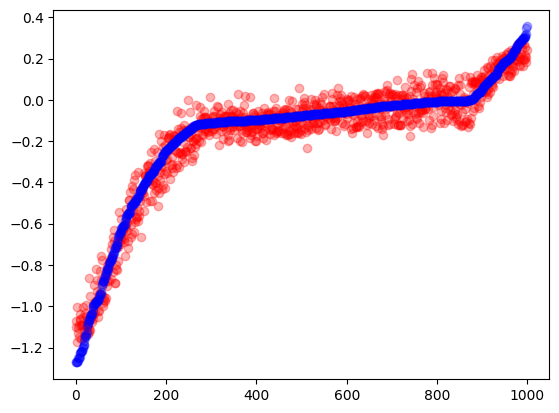

In [20]:
y_pred_sort, y_eval_sort = ut.sort_data(y_pred, y_eval)

i = range(len(y_pred_sort))
plt.scatter(i, y_pred_sort, alpha=0.3, color='red', label='Predictions')
plt.scatter(i, y_eval_sort, alpha=0.3, color='blue', label='True Values')

plt.show()

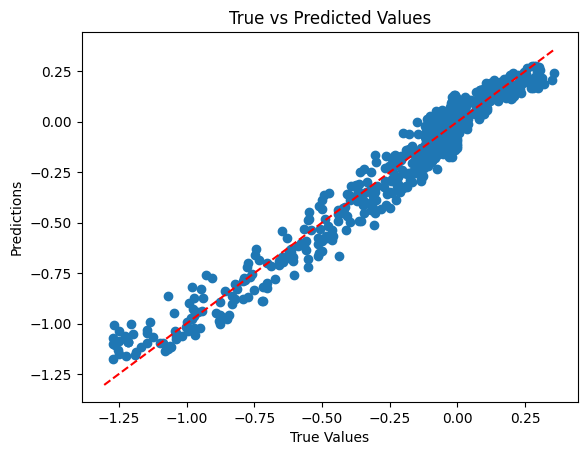

In [21]:
# 1. y_true vs y_pred
plt.scatter(y_eval, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title('True vs Predicted Values')
plt.show()


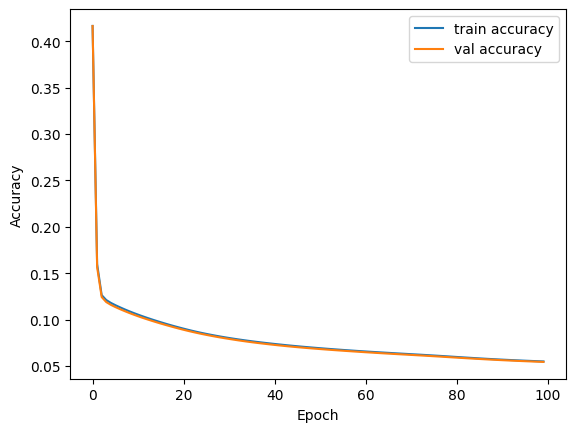

In [22]:
start_epoch = 0
end_epoch = len(train_accs)

plt.plot(train_accs[start_epoch:end_epoch], label='train accuracy')
plt.plot(val_accs[start_epoch:end_epoch], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### DL: 3 hidden layer, 

#### Load dataset and Set up mmodels

In [23]:
# Overview (Deep Learning from Scratch):
# Input layer: sample_dims with 2 features input each 
# 1st Hidden Layer: 2 input dim, 5 output dim, ReLU activate funciton
# 2st Hidden Layer: 5 input dim, 5 output dim, ReLU activate funciton
# 3st Hidden Layer: 5 input dim, 5 output dim, ReLU activate funciton
# Output Layer: 5 input dim, 1 output dim, no activate funciton

sample_dim = 4000
split_ration = 0.8

input_dim = 2
h1_dim = 10
h2_dim = 5
h3_dim = 3
output_dim = 1

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,3) - np.pow(linear+0.2,2)*0.5 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 2))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])

# W1 [input_dim, h1_dim]
# b1 [1, h1_dim]
W1 = np.random.rand(input_dim,h1_dim) * np.sqrt(2/input_dim)
b1 = 0

# W2 [h1_dim, h2_dim]
# b2 [1, h2_dim]
W2 = np.random.rand(h1_dim,h2_dim) * np.sqrt(2/h1_dim)
b2 = 0

# W2 [h2_dim, W_h3]
# b2 [1, W_h3]
W3 = np.random.rand(h2_dim,h3_dim) * np.sqrt(2/h2_dim)
b3 = 0

# W2 [h1_dim, h2_dim]
# b2 [1, h2_dim]
W4 = np.random.rand(h3_dim,output_dim) * np.sqrt(2/h3_dim)
b4 = 0

# Hyperparameters
epochs = 600
batch_size = 16
learning_rate = 0.001

#### Visualize dataset

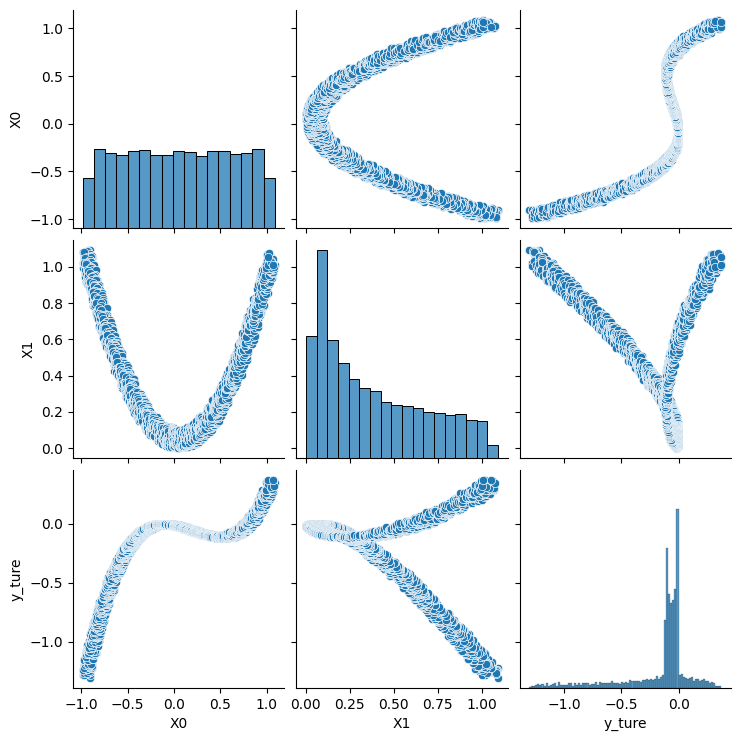

In [24]:
# put your inputs and outputs together in one DataFrame
df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]

# make the pairplot
sns.pairplot(df)

#### Train Models

In [25]:
def fit_linear_regression_three_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, W3, b3, W4, b4, epochs=10, batch_size=32, learning_rate=0.001):
    train_accs = []
    val_accs = []

    for j in range(epochs):
        for i in range(0, len(X_train), batch_size):
            # Fetch the batch
            X_train_batch = X_train[i:i+batch_size]
            y_train_batch = y_train[i:i+batch_size]

            # Forward pass
            z1 = np.dot(X_train_batch, W1) + b1
            a1 = ut.relu(z1)

            z2 = np.dot(a1, W2) + b2
            a2 = ut.relu(z2)

            z3 = np.dot(a2, W3) + b3
            a3 = z3

            z4 = np.dot(a3, W4) + b4
            y_pred_batch = z4

            # Compute gradients
            # Mean Squared Error Loss: L = (1/N) * Σ(y_true - y_pred)^2
            # Gradient of L w.r.t. y_pred: 
            # dL/dz4 = (2/N) * (y_pred - y_true)

            # Using MAE at first load, and MSE follow it trend.
            # if i==0:
            #     loss_vector = np.where(y_pred_batch >= y_train_batch, 1, -1)
            #     dL_dz4 = (2/batch_size) * loss_vector
            # else:
            dL_dz4 = (2/batch_size) * (y_pred_batch - y_train_batch)

            # Gradient of L w.r.t. Z3:
            # dL/dz3 = da3/dz3 -> dz4/da3 -> dL/dz4
            # dL/dz3 = f'(z3) -> np.dot(..., W4.T) -> dL_dz4
            # dL/dz3 = f'(z3) -> np.dot(dL_z4, W4.T)
            dL_dz3 = np.dot(dL_dz4, W4.T) 

            # Gradient of L w.r.t. Z2:
            # dL/dz2 = da2/dz2 -> dz3/da2 -> dL/dz3
            # dL/dz3 = f'(z2) -> np.dot(..., W3.T) -> dL_dz3
            # dL/dz3 = f'(z2) -> np.dot(dL_z3, W3.T)
            dL_dz2 = ut.relu_derivative(z2) * np.dot(dL_dz3, W3.T) 

            # Gradient of L w.r.t. Z1:
            dL_dz1 = ut.relu_derivative(z1) * np.dot(dL_dz2, W2.T) 

            # Gradient of L w.r.t. W: 
            # dL/dW = dz4/dW -> dL/dz
            # dL/dW = np.dot(a.T, ...) -> dL_dz
            # dL/dW = np.dot(a.T, dL_dz)
            # Summation of Xi * Li
            dw4 = np.dot(a3.T, dL_dz4)
            dw3 = np.dot(a2.T, dL_dz3)
            dw2 = np.dot(a1.T, dL_dz2)
            dw1 = np.dot(X_train_batch.T, dL_dz1)  

            # Gradient of L w.r.t. b1: dL/db1 = Σ(dL/da)
            db4 = np.sum(dL_dz4, axis=0, keepdims=True)
            db3 = np.sum(dL_dz3, axis=0, keepdims=True)
            db2 = np.sum(dL_dz2, axis=0, keepdims=True)
            db1 = np.sum(dL_dz1, axis=0, keepdims=True)


            # Update weights and bias
            # Gradient Descent update rule
            # W = W - learning_rate * dL/dW
            W1 -= learning_rate * dw1
            W2 -= learning_rate * dw2
            W3 -= learning_rate * dw3
            W4 -= learning_rate * dw4


            # b = b - learning_rate * dL/db
            b1 -= learning_rate * db1
            b2 -= learning_rate * db2
            b3 -= learning_rate * db3
            b4 -= learning_rate * db4

        # Evaluate accuracy on the entire dataset after each epoch
        z1 = np.dot(X_eval, W1) + b1
        a1 = ut.relu(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = ut.relu(z2)

        z3 = np.dot(a2, W3) + b3
        a3 = z3

        z4 = np.dot(a3, W4) + b4
        y_eval_pred = z4
        print(f"Epoch {j+1}/{epochs} accuracy: {ut.accuracy(y_eval, y_eval_pred):.3f}")

        z1 = np.dot(X_train, W1) + b1
        a1 = ut.relu(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = ut.relu(z2)

        z3 = np.dot(a2, W3) + b3
        a3 = z3

        z4 = np.dot(a3, W4) + b4  
        y_train_pred= z4

        # Score History
        train_acc = ut.accuracy(y_train, y_train_pred)
        val_acc = ut.accuracy(y_eval, y_eval_pred)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

    # Finised y_pred
    z1 = np.dot(X_eval, W1) + b1
    a1 = ut.relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = ut.relu(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = z3

    z4 = np.dot(a3, W4) + b4
    y_pred= z4

    return W1, b1, W2, b2, W3, b3, W4, b4, y_pred, train_accs, val_accs

In [26]:
"Before training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'Before training, accuracy: 0.702'

In [27]:
W1, b1, W2, b2, W3, b3, W4, b4, y_pred, train_accs, val_accs = fit_linear_regression_three_hidden_layer(X_train, y_train, X_eval, y_eval, W1, b1, W2, b2, W3, b3, W4, b4, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

Epoch 1/600 accuracy: 0.287
Epoch 2/600 accuracy: 0.217
Epoch 3/600 accuracy: 0.201
Epoch 4/600 accuracy: 0.196
Epoch 5/600 accuracy: 0.195
Epoch 6/600 accuracy: 0.193
Epoch 7/600 accuracy: 0.192
Epoch 8/600 accuracy: 0.191
Epoch 9/600 accuracy: 0.191
Epoch 10/600 accuracy: 0.190
Epoch 11/600 accuracy: 0.189
Epoch 12/600 accuracy: 0.189
Epoch 13/600 accuracy: 0.188
Epoch 14/600 accuracy: 0.188
Epoch 15/600 accuracy: 0.188
Epoch 16/600 accuracy: 0.187
Epoch 17/600 accuracy: 0.187
Epoch 18/600 accuracy: 0.187
Epoch 19/600 accuracy: 0.186
Epoch 20/600 accuracy: 0.186
Epoch 21/600 accuracy: 0.185
Epoch 22/600 accuracy: 0.185
Epoch 23/600 accuracy: 0.185
Epoch 24/600 accuracy: 0.184
Epoch 25/600 accuracy: 0.184
Epoch 26/600 accuracy: 0.184
Epoch 27/600 accuracy: 0.183
Epoch 28/600 accuracy: 0.183
Epoch 29/600 accuracy: 0.182
Epoch 30/600 accuracy: 0.182
Epoch 31/600 accuracy: 0.181
Epoch 32/600 accuracy: 0.181
Epoch 33/600 accuracy: 0.180
Epoch 34/600 accuracy: 0.180
Epoch 35/600 accuracy: 

In [28]:
"after training, accuracy: {:.3f}".format(ut.accuracy(y_eval, y_pred))

'after training, accuracy: 0.027'

#### Evaluate Models

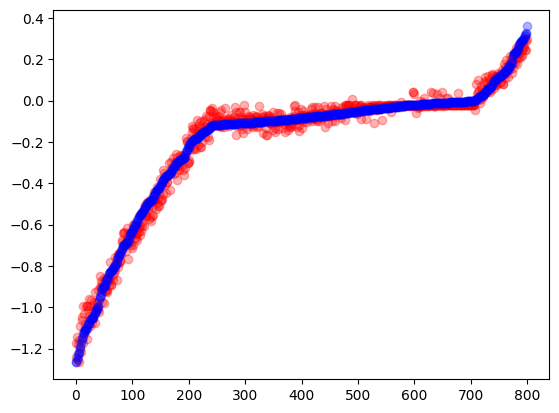

In [29]:
y_pred_sort, y_eval_sort = ut.sort_data(y_pred, y_eval)

i = range(len(y_pred_sort))
plt.scatter(i, y_pred_sort, alpha=0.3, color='red', label='Predictions')
plt.scatter(i, y_eval_sort, alpha=0.3, color='blue', label='True Values')

plt.show()

In [30]:
y_pred.shape

(800, 1)

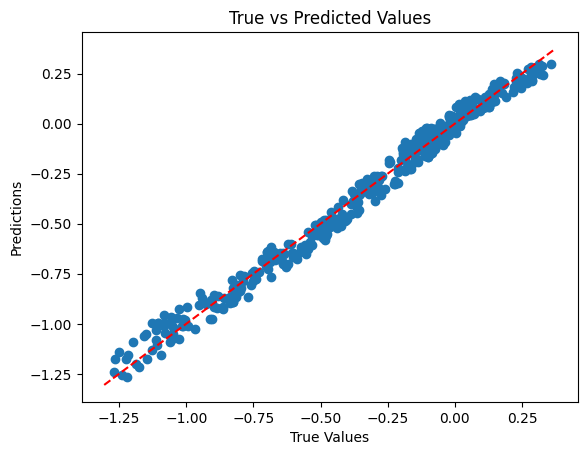

In [31]:
# 1. y_true vs y_pred
plt.scatter(y_eval, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.title('True vs Predicted Values')
plt.show()


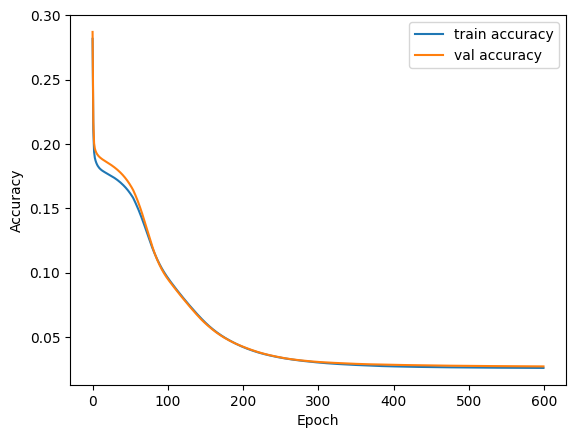

In [32]:
start_epoch = 0
end_epoch = len(train_accs)

plt.plot(train_accs[start_epoch:end_epoch], label='train accuracy')
plt.plot(val_accs[start_epoch:end_epoch], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Models Library Testing

In [33]:
model = my_models.Lr_Models()

In [34]:
model.add(50, input_shape=2)
model.add(30, activation="relu")
model.add(10, activation="relu")
model.add(10, activation="relu")
model.add(5)
model.add(1)

# model.add_layer(2,100)
# model.add_activate_func("relu")
# model.add_layer(100,50)
# model.add_activate_func("relu")
# model.add_layer(50, 10)
# model.add_layer(10, 1)

In [35]:
model.total_params()

2161

In [36]:
sample_dim = 4000
input_dim = 2
output_dim = 1
split_ration = 0.8

# Generate some linear sample_dim data
# linear [sample_dim_dim, 1]
linear = np.linspace(-1, 1, sample_dim).reshape(-1, 1)

# z [sample_dim, output_dim]
y_true = np.pow(linear,5)*0.5 + np.pow(linear, 1)*0.3 + np.pow(linear,2)*np.random.rand(sample_dim,output_dim)*0.1

y_true = np.abs(y_true)

# X [sample_dim, input_dim]
X = np.column_stack((linear, np.pow(linear, 3))).reshape(sample_dim, input_dim)+ np.random.rand(sample_dim,input_dim)*0.1

# Split dataset
X_train, y_train, X_eval, y_eval = ut.split_data(X, y_true, split_ration)
y_pred = np.random.rand(y_eval.shape[0], y_eval.shape[1])


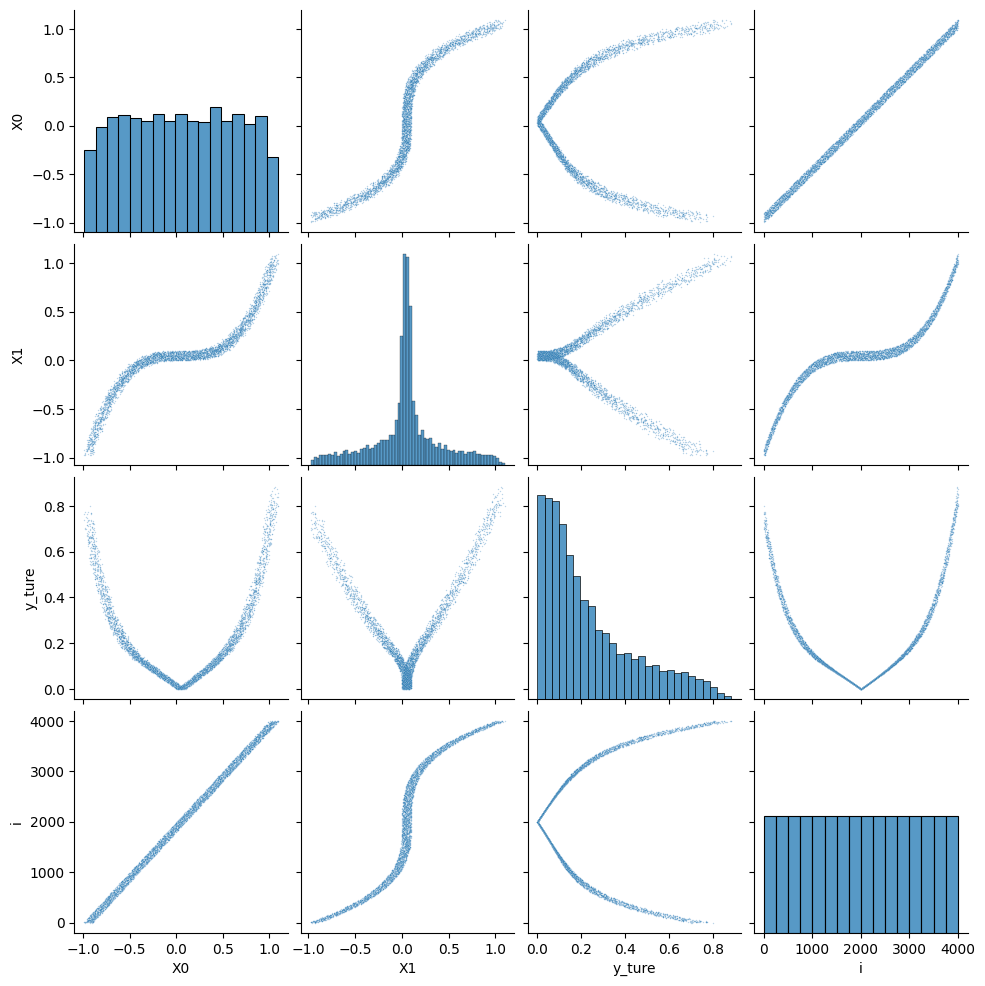

In [37]:
# put your inputs and outputs together in one DataFrame
i = np.arange(1, X.shape[0]+1)

df = pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])])
df["y_ture"] = y_true if y_true.ndim == 1 else y_true[:,0]
df["i"] = i

# make the pairplot
sns.pairplot(df,  plot_kws={"alpha": 0.3, "s": 1})

In [38]:
history = model.fit(X_train, y_train, X_eval, y_eval, epochs=200, batch_size=8, learning_rate=0.00004)

Epoch 1/200 [=........................]
loss: 0.3749, val_loss: 0.3740

Epoch 2/200 [=........................]
loss: 0.2688, val_loss: 0.2693

Epoch 3/200 [=........................]
loss: 0.2250, val_loss: 0.2246

Epoch 4/200 [=........................]
loss: 0.1977, val_loss: 0.1972

Epoch 5/200 [=........................]
loss: 0.1784, val_loss: 0.1782

Epoch 6/200 [=........................]
loss: 0.1641, val_loss: 0.1635

Epoch 7/200 [=........................]
loss: 0.1534, val_loss: 0.1525

Epoch 8/200 [=........................]
loss: 0.1451, val_loss: 0.1442

Epoch 9/200 [==.......................]
loss: 0.1381, val_loss: 0.1373

Epoch 10/200 [==.......................]
loss: 0.1318, val_loss: 0.1310

Epoch 11/200 [==.......................]
loss: 0.1256, val_loss: 0.1247

Epoch 12/200 [==.......................]
loss: 0.1193, val_loss: 0.1183

Epoch 13/200 [==.......................]
loss: 0.1127, val_loss: 0.1116

Epoch 14/200 [==.......................]
loss: 0.1061, val_l

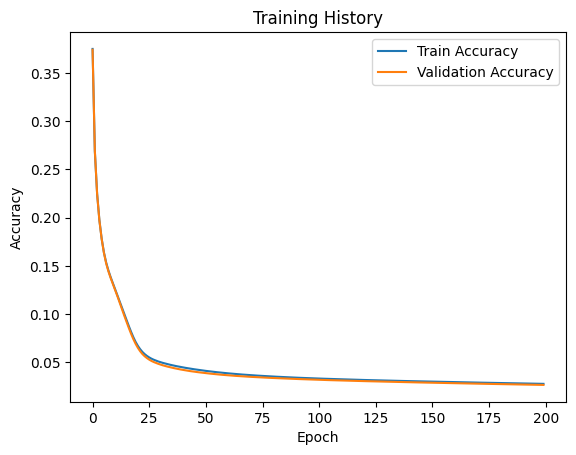

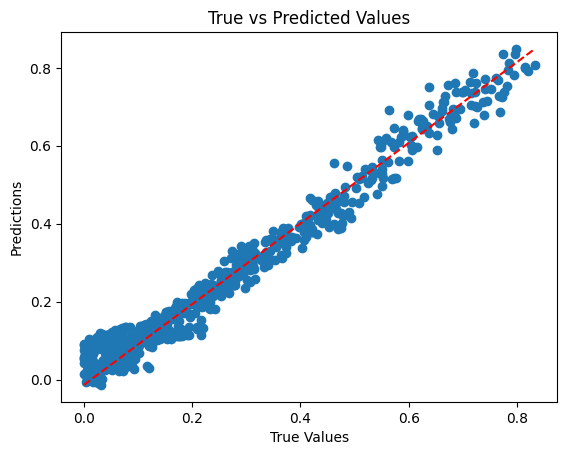

In [39]:
history.evaluate()

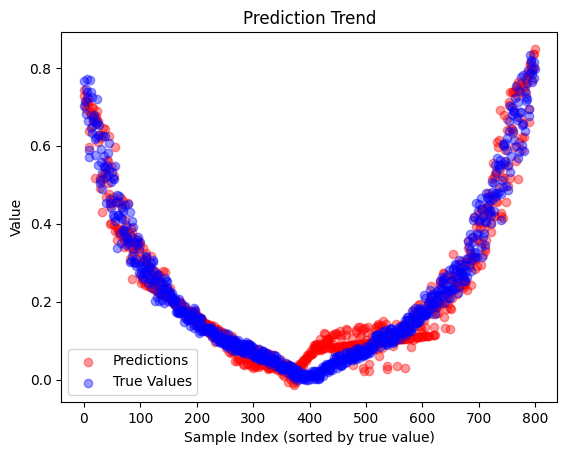

In [40]:
history.display_trend(ref="x", axis=0)

### Ideas Space

In [41]:
indices = np.arange(y_pred.shape[0])

In [42]:
np.random.shuffle(indices)
indices

array([538, 461, 177, 561, 255,   5, 718, 175, 529, 344, 584, 756, 681,
       262, 379, 203, 582,  85, 596, 503,  63, 374,  81, 667, 415, 127,
       719, 291, 204, 112, 259, 146, 704, 242, 411, 679, 634, 721, 451,
       320,  39, 100, 457, 339, 500, 513, 180, 244, 601, 143, 136, 332,
       201, 345,  87, 476, 193, 416,  52, 212, 641, 272,  91, 726, 266,
       530, 188, 124, 668, 376,  27, 611, 593, 126, 722, 161, 132,  19,
       422, 444, 458,  14, 186,  66, 417,  46, 115, 637, 752, 308, 629,
       156, 360, 305, 209, 465, 567, 658, 192, 390, 346,   4, 624, 520,
       533, 742, 743, 251, 566, 703, 557, 489, 122, 466, 635,  12, 295,
       423, 623, 714, 335, 605, 666, 736,  31, 649, 318, 471, 359, 665,
        78, 290, 768, 377,  41, 273, 484, 572, 769, 563,  28, 354, 164,
         0, 414, 103, 490, 552, 426, 298, 795,  47, 767, 793, 587, 787,
       661,  32, 576, 652, 217,  94, 367, 472, 501, 229, 761, 609,  29,
       773, 107, 553, 792, 527, 294, 275, 554, 464, 117, 238, 18

In [43]:
indices.reshape(-1, 1)

array([[538],
       [461],
       [177],
       [561],
       [255],
       [  5],
       [718],
       [175],
       [529],
       [344],
       [584],
       [756],
       [681],
       [262],
       [379],
       [203],
       [582],
       [ 85],
       [596],
       [503],
       [ 63],
       [374],
       [ 81],
       [667],
       [415],
       [127],
       [719],
       [291],
       [204],
       [112],
       [259],
       [146],
       [704],
       [242],
       [411],
       [679],
       [634],
       [721],
       [451],
       [320],
       [ 39],
       [100],
       [457],
       [339],
       [500],
       [513],
       [180],
       [244],
       [601],
       [143],
       [136],
       [332],
       [201],
       [345],
       [ 87],
       [476],
       [193],
       [416],
       [ 52],
       [212],
       [641],
       [272],
       [ 91],
       [726],
       [266],
       [530],
       [188],
       [124],
       [668],
       [376],
       [ 27],
      

In [44]:
np.sort(indices, axis=0)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [45]:
y_pred

array([[0.589],
       [0.842],
       [0.212],
       [0.161],
       [0.923],
       [0.978],
       [0.065],
       [0.054],
       [0.354],
       [0.652],
       [0.349],
       [0.112],
       [0.385],
       [0.622],
       [0.603],
       [0.624],
       [0.751],
       [0.699],
       [0.608],
       [0.734],
       [0.136],
       [0.308],
       [0.16 ],
       [0.124],
       [0.334],
       [0.459],
       [0.836],
       [0.491],
       [0.808],
       [0.143],
       [0.948],
       [0.205],
       [0.758],
       [0.552],
       [0.46 ],
       [0.453],
       [0.032],
       [0.985],
       [0.358],
       [0.185],
       [0.641],
       [0.815],
       [0.725],
       [0.989],
       [0.604],
       [0.982],
       [0.471],
       [0.638],
       [0.867],
       [0.562],
       [0.671],
       [0.901],
       [0.793],
       [0.815],
       [0.018],
       [0.901],
       [0.391],
       [0.925],
       [0.837],
       [0.673],
       [0.158],
       [0.595],
       [

In [46]:
np.column_stack((y_pred, indices))

array([[  0.589, 538.   ],
       [  0.842, 461.   ],
       [  0.212, 177.   ],
       ...,
       [  0.442, 213.   ],
       [  0.613, 163.   ],
       [  0.878, 700.   ]], shape=(800, 2))